In [9]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random
import re

directory_path = "/Users/bao.vo/PycharmProjects/PythonProject/Data"

In [18]:
# Set the directory containing your CSV files
directory_path = "/Users/bao.vo/PycharmProjects/PythonProject/"

csv_files = glob.glob(os.path.join(directory_path, "*.csv"))

print(f"Found {len(csv_files)} CSV files.")

Found 5 CSV files.


In [13]:
illuminate = pd.read_csv(
    os.path.join(directory_path, "IlluminateData2025.csv"),
    encoding='cp1252',  # or try 'ISO-8859-1' or 'cp1252'
    low_memory=True
)

In [14]:
display(illuminate.head())

,schoolyearnumberspring,unitnumber,Mask_StudentPersonkey,title,AssessmentId,responsedatevalue,DateValue,Response_points,Response_points_possible,Response_percent_correct,...,Standard_percent_correct,condition,pointsvarchar,categorytitle,stdgrouping,SchoolId,GradeLevelDuringUnitTest,ContinuousAchievementLevel,AssessmentGradeLevel,CurrentSchoolDetailFCSID
0,2025,3,406954,language arts,379494,2025-01-13 00:00:00,2025-01-13 00:00:00,10.0,14.0,71.43,...,100.0,Extension,2/2,Grade 6,ELAGSE6RL4 Determine the meaning of words and ...,63,06,On Level,6,682
1,2025,2,405935,math,356052,2024-10-14 00:00:00,2024-10-14 00:00:00,10.0,14.0,71.43,...,100.0,Extension,2/2,6th Grade,6.NR.2.4 Design simple experiments and collect...,103,06,On Level,6,697
2,2025,4,728618,language arts,379314,2025-02-14 00:00:00,2025-02-14 00:00:00,12.0,17.0,70.59,...,100.0,Extension,1/1,Grades: 9-10,ELAGSE9-10L2a Use a semicolon (and perhaps a c...,77,09,On Level,10,845
3,2025,3,728056,math,357687,2024-12-19 00:00:00,2024-12-19 00:00:00,11.5,15.0,76.67,...,100.0,Extension,3/3,7th Grade,7.PAR.4.2 Determine the unit rate (constant of...,102,06,Advanced,7,699
4,2025,4,728145,language arts,383115,2025-02-11 00:00:00,2025-02-11 00:00:00,12.5,13.0,96.15,...,100.0,Extension,1/1,Grade 3,ELAGSE3L4 Determine or clarify the meaning of ...,61,03,On Level,3,654


In [16]:
for col in illuminate.columns:
    unique_vals = illuminate[col].unique()
    print(f"Column: {col} ({len(unique_vals)} unique values)")
    print(unique_vals[:10])  # Show first 10
    print("-" * 50)

Column: schoolyearnumberspring (1 unique values)
[2025]
--------------------------------------------------
Column: unitnumber (13 unique values)
['3' '2' '4' '1' '9' '8' '5' '6' '7' '5A']
--------------------------------------------------
Column: Mask_StudentPersonkey (75082 unique values)
[406954 405935 728618 728056 728145 581810 612266 575620 397028 389057]
--------------------------------------------------
Column: title (5 unique values)
['language arts' 'math' 'Language Arts' 'social sciences' 'Science']
--------------------------------------------------
Column: AssessmentId (224 unique values)
[379494 356052 379314 357687 383115 341795 392299 356893 338215 376921]
--------------------------------------------------
Column: responsedatevalue (241 unique values)
['2025-01-13 00:00:00' '2024-10-14 00:00:00' '2025-02-14 00:00:00'
 '2024-12-19 00:00:00' '2025-02-11 00:00:00' '2024-09-16 00:00:00'
 '2025-03-26 00:00:00' '2024-09-20 00:00:00' '2024-12-17 00:00:00'
 '2024-11-11 00:00:00']

In [19]:
final_df = pd.read_csv(
    os.path.join(directory_path, "Final_DF.csv"),
    low_memory=True
)
display(final_df.head())

/var/folders/h6/zpsbdpxs6dxg5vq66fkdgnr00000gp/T/ipykernel_32158/1369248974.py:1: DtypeWarning: Columns (9,12,20) have mixed types. Specify dtype option on import or set low_memory=False.
  final_df = pd.read_csv(


,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,StaffPersonKey,student_id,SchoolLevel,CredStill_ELA,CredStill_Electives,CredStill_Health/ PersonalFitness,CredStill_Math,CredStill_Science,CredStill_Social Studies,CredStill_World Language/ FineArts/ CareerTech
0,9,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,852.0,191.0,Level 2 Honors,23.062004,...,7186.0,370673,High,2.0,1.0,0.5,1.5,1.5,1.0,0.0
1,9,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.011004,...,110809.0,311666,High,1.5,1.5,0.5,1.5,1.5,1.5,0.0
2,9,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,741.0,910.0,Level 2 Honors,23.062004,...,3931.0,329248,High,1.5,3.0,0.5,0.0,0.0,0.5,0.0
3,9,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.011004,...,110809.0,354631,High,1.5,1.5,0.0,1.5,1.0,1.5,0.0
4,9,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,866.0,198.0,Level 2 Honors,23.062004,...,111252.0,331279,High,1.5,2.0,0.5,1.5,1.5,1.0,0.0


In [10]:
illuminate_clean = pd.read_csv(
    os.path.join(directory_path, "cleaned_illuminate.csv"),
    encoding='cp1252',  # or try 'ISO-8859-1' or 'cp1252'
    low_memory=True
)

In [4]:
eda_files = [
    "Georgia Milestones Scores.csv",
    "Georgia Milestones Sublevel Score.csv",
    "StudentTeacherGradeCombined",
    "GraduationAreaSummary.csv",
    "Courses.csv"
]

for fname in eda_files:
    fpath = os.path.join(directory_path, fname)
    try:
        try:
            df = pd.read_csv(fpath, encoding="utf-8", low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(fpath, encoding="latin1", low_memory=False)

        print(f"\n📊 First 5 rows of {fname}:")
        display(df.head(5))

    except FileNotFoundError:
        print(f"File not found: {fname}")
    except Exception as e:
        print(f"Failed to load {fname}: {e}")


📊 First 5 rows of Georgia Milestones Scores.csv:


,GeorgiaMilestonesId,GeorgiaMilestonesAchievementLevelId,SubjectDesc,SchoolYearId,AssessmentAdministrationWindowId,AssessmentAdministrationWindowDesc,TestingDateId,StudentPersonKey_mask,SchoolDetailFCSId,SchoolId,...,ActiveFactGeorgiaMilestonesRecordFlag,ExtendedWritingT1Score,ExtendedWritingT2Score,NarrativeWritingResponse,ExtendedWritingPromptGenre,StudentGrowthPercentileFinal,StudentGrowthLevel,Assmnt_Sci,NRTNP_Range,Retest_Flag
0,1362898,1,Algebra I,32,5,Fall MM,11319,356119,804,143,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1362899,2,American Literature & Composition,32,5,Fall MM,11319,217864,852,78,...,Y,3.0,2.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
2,1362900,4,American Literature & Composition,32,5,Fall MM,11319,237883,852,78,...,Y,2.0,2.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN
3,1362901,2,Algebra I,32,5,Fall MM,11319,236191,852,78,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1362902,1,Biology,32,5,Fall MM,11319,196546,852,78,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



📊 First 5 rows of Georgia Milestones Sublevel Score.csv:


,GeorgiaMilestonesSublevelId,GeorgiaMilestonesId,SchoolId,SchoolDetailFCSId,StudentPersonKey_mask,AssessmentId,TestingDateId,AssessmentAdministrationWindowId,SchoolYearId,GeorgiaMilestonesMasteryLevelId,MasteryCategoryDomainScore,ActiveFactGeorgiaMilestonesSublevelRecordFlag
0,4700514,1362898,143,804,356119,767,11319,5,32,1,1,Y
1,4700515,1362898,143,804,356119,1070,11319,5,32,1,1,Y
2,4700516,1362898,143,804,356119,1071,11319,5,32,1,1,Y
3,4700517,1362898,143,804,356119,1072,11319,5,32,1,1,Y
4,4700518,1362899,78,852,217864,569,11319,5,32,1,1,Y


File not found: StudentTeacherGradeCombined

📊 First 5 rows of GraduationAreaSummary.csv:


,mask_studentpersonkey,CurrentSchoolDetailFCSId,SchoolId,SchoolYearNumberFall,SubjectArea,SubjectAreaCreditRequired,AreaCredits,AreaCreditStillNeeded
0,350335,741,115,2023,Math,4,1.5,2.5
1,1946451,870,80,2022,Health/ PersonalFitness,1,0.5,0.5
2,1987664,880,81,2024,World Language/ FineArts/ CareerTech,3,1.0,2.0
3,1521002,804,143,2024,World Language/ FineArts/ CareerTech,3,1.5,1.5
4,317341,751,74,2021,Social Studies,3,2.5,0.5



📊 First 5 rows of Courses.csv:


,siscourseidentifier,CourseId,coursename,schooldetaillevelcode,DepartmentCode,DepartmentDesc,SubjectAreaDesc,DOECourseNumber,Active_status,Source,honorsCode,HonorsDesc,CourseLevelNumber,CourseLevelDesc
0,17.01104,7799,College Health,HS,HLTH,HEALTH EDUCATION,HEALTH,17.011,Y,CC,DUAL,Dual Enrollment,0,Level 2 Honors
1,27.061066,8107,TR Resrch Meth M H,HS,MATH,MATH,ELECTIVE,NaN,NaN,TR,NaN,NaN,0,Level 2 Honors
2,27.0610661,8108,TR Resrch Meth M H,HS,MATH,MATH,ELECTIVE,NaN,NaN,TR,NaN,NaN,0,Level 2 Honors
3,00.0011040,8843,Advisement 10-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors
4,00.0010940,8844,Advisement 09-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors


In [5]:
# GraduationAreaSummary.csv
grad_summary = pd.read_csv(os.path.join(directory_path, "GraduationAreaSummary.csv"), low_memory=False)

# Courses.csv (static course catalog)
courses = pd.read_csv(os.path.join(directory_path, "Courses.csv"), low_memory=False)

all_grades = pd.read_csv(os.path.join(directory_path, "StudentTeacherGradeCombined.csv"), low_memory=False)
def categorize_grade_level(grade):
    if grade in ['K', '01', '02', '03', '04', '05']:
        return 'Elementary'
    elif grade in ['06', '07', '08']:
        return 'Middle'
    elif grade in ['09', '10', '11', '12']:
        return 'High'
    else:
        return 'Unknown'

all_grades['SchoolLevel'] = all_grades['GradeLevel'].apply(categorize_grade_level)

display(all_grades.head())

,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,EndPeriodCode,SchoolCourseDesc,AttemptedCredit,EarnedCredit,MarkTypeCode,MarkTypeDesc,Mark,StaffPersonKey,mask_studentpersonkey,SchoolLevel
0,01,32,2021-2022,Q2,2021-10-13 00:00:00.000,2021-12-17 00:00:00.000,380.0,193.0,Level 1,00.0001110,...,5,Odyssey,0.0,0.0,S18,Semester,NaN,14906.0,418681.0,Elementary
1,01,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,155.0,298.0,Level 1,00.8000000,...,1,Sc-Sec,0.0,0.0,S18,Semester,NaN,-1.0,419430.0,Elementary
2,01,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,601.0,101.0,Level 1,00.8000000,...,1,Sc-Sec,0.0,0.0,S18,Semester,NaN,65356.0,433229.0,Elementary
3,01,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,324.0,5060.0,Level 1,00.8000000,...,1,Sc-Sec,0.0,0.0,S18,Semester,NaN,29922.0,419002.0,Elementary
4,01,32,2021-2022,Q1,2021-08-09 00:00:00.000,2021-10-08 00:00:00.000,380.0,193.0,Level 1,00.0001110,...,5,Odyssey,0.0,0.0,S18,Semester,NaN,14906.0,466709.0,Elementary


In [6]:
all_grades = all_grades.rename(columns={"mask_studentpersonkey": "student_id"})

In [7]:
# Filter only High School students with credit data
hs_grades = all_grades[
    (all_grades["SchoolLevel"] == "High") &
    (all_grades["AttemptedCredit"].notna()) &
    (all_grades["EarnedCredit"] > 0)
]
display(hs_grades.sort_values(by="AttemptedCredit", ascending=False).head(5))

,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,EndPeriodCode,SchoolCourseDesc,AttemptedCredit,EarnedCredit,MarkTypeCode,MarkTypeDesc,Mark,StaffPersonKey,student_id,SchoolLevel
6048217,12,34,2023-2024,S1,2023-08-07 00:00:00.000,2023-12-15 00:00:00.000,753.0,1323.0,NaN,11.7116101,...,8th,WBL - Computing/Ntwk,1.5,1.5,S18,Semester,97,114329.0,584198.0,High
8288912,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,753.0,1323.0,NaN,21.7116101,...,Advisement,WBL - Engineering,1.5,1.5,S18,Semester,70,114329.0,766803.0,High
6052782,12,34,2023-2024,S1,2023-08-07 00:00:00.000,2023-12-15 00:00:00.000,982.0,118.0,NaN,06.7116101,...,4,WBL - Entrepreneurship,1.5,1.5,S18,Semester,100,70017013.0,432989.0,High
6020559,12,34,2023-2024,S1,2023-08-07 00:00:00.000,2023-12-15 00:00:00.000,870.0,291.0,NaN,45.7115101,...,3,WBL - Social Studies,1.5,1.5,S18,Semester,94,24568.0,253993.0,High
8248668,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,982.0,118.0,NaN,06.7116101,...,4,WBL - Entrepreneurship,1.5,1.5,S18,Semester,100,70017013.0,322508.0,High


In [8]:
# Make cleaned copies before modifying
hs_grades_cleaned = hs_grades.copy()
grad_summary_cleaned = grad_summary.copy()
hs_grades_cleaned.loc[:, "student_id"] = hs_grades_cleaned["student_id"].astype(str).str.replace(r"\.0$", "", regex=True)

# Rename and normalize student ID in the graduation summary
grad_summary_cleaned['student_id'] = grad_summary_cleaned['mask_studentpersonkey'].astype(str)
grad_summary_cleaned['student_id'] = grad_summary_cleaned['student_id'].str.replace(r"\\.0$", "", regex=True)
grad_summary_cleaned = grad_summary_cleaned.drop(columns=["mask_studentpersonkey"])


# Normalize student ID in the grades data
# The column is already named 'student_id'
hs_grades_cleaned['student_id'] = hs_grades_cleaned['student_id'].astype(str)
hs_grades_cleaned['student_id'] = hs_grades_cleaned['student_id'].str.replace(r"\\.0$", "", regex=True)


print("✅ Student IDs have been cleaned and normalized in both DataFrames.")
display(grad_summary_cleaned.head(2))
display(hs_grades_cleaned.head(2))


/var/folders/h6/zpsbdpxs6dxg5vq66fkdgnr00000gp/T/ipykernel_46557/665171736.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['370673' '311666' '329248' ... '361715' '361715' '361715']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hs_grades_cleaned.loc[:, "student_id"] = hs_grades_cleaned["student_id"].astype(str).str.replace(r"\.0$", "", regex=True)


✅ Student IDs have been cleaned and normalized in both DataFrames.


,CurrentSchoolDetailFCSId,SchoolId,SchoolYearNumberFall,SubjectArea,SubjectAreaCreditRequired,AreaCredits,AreaCreditStillNeeded,student_id
0,741,115,2023,Math,4,1.5,2.5,350335
1,870,80,2022,Health/ PersonalFitness,1,0.5,0.5,1946451


,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,EndPeriodCode,SchoolCourseDesc,AttemptedCredit,EarnedCredit,MarkTypeCode,MarkTypeDesc,Mark,StaffPersonKey,student_id,SchoolLevel
3326453,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,852.0,191.0,Level 2 Honors,23.0620041,...,1,10th Lit/Comp H,0.5,0.5,S18,Semester,100,7186.0,370673,High
3326455,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,6,Phys Sci H,0.5,0.5,S18,Semester,99,110809.0,311666,High


In [9]:
### Using Graduate Area Summary as primary dataset since we focus on Graduation Recommendation ###

summary_ids = set(grad_summary_cleaned["student_id"])

# Get student IDs with course records in 2024-2025
active_2024_ids = set(
    hs_grades_cleaned[hs_grades_cleaned["SchoolYear"] == "2024-2025"]["student_id"]
)

# Find which summary students are active this year
active_summary_students = summary_ids & active_2024_ids
inactive_summary_students = summary_ids - active_2024_ids

# Report
print(f"📘 Students in summary: {len(summary_ids)}")
print(f"✅ Still active in 2024–2025: {len(active_summary_students)}")
print(f"❌ No activity in 2024–2025: {len(inactive_summary_students)}")

# Show a few inactive IDs
if inactive_summary_students:
    print("Sample of inactive students:")
    display(list(inactive_summary_students)[:5])

📘 Students in summary: 29316
✅ Still active in 2024–2025: 28442
❌ No activity in 2024–2025: 874
Sample of inactive students:


['2000943', '314469', '403848', '334321', '300864']

In [10]:
# Keep only active students in 2024–2025 for recommendations
grad_summary_filtered = grad_summary_cleaned[
    grad_summary_cleaned["student_id"].isin(active_2024_ids)
]

display(grad_summary_filtered.head())
print(len(grad_summary_filtered))

,CurrentSchoolDetailFCSId,SchoolId,SchoolYearNumberFall,SubjectArea,SubjectAreaCreditRequired,AreaCredits,AreaCreditStillNeeded,student_id
0,741,115,2023,Math,4,1.5,2.5,350335
1,870,80,2022,Health/ PersonalFitness,1,0.5,0.5,1946451
2,880,81,2024,World Language/ FineArts/ CareerTech,3,1.0,2.0,1987664
3,804,143,2024,World Language/ FineArts/ CareerTech,3,1.5,1.5,1521002
4,751,74,2021,Social Studies,3,2.5,0.5,317341


192326


In [11]:
# Join grad summary with hs_grades
merged = grad_summary_filtered.merge(
    hs_grades_cleaned,
    on="student_id",
    how="inner"
)

#  Keep relevant columns
credit_data = merged[["student_id", "SubjectArea", "AreaCreditStillNeeded"]].drop_duplicates()

# Pivot to get SubjectArea as columns and values as AreaCreditStillNeeded
credit_pivot = credit_data.pivot_table(
    index="student_id",
    columns="SubjectArea",
    values="AreaCreditStillNeeded",
    aggfunc="last"
).fillna(0)

# Clean column names
credit_pivot.columns = [f"CredStill_{col}" for col in credit_pivot.columns]
credit_pivot.reset_index(inplace=True)

# Merge back with hs_grades_cleaned to enrich further
final_df = hs_grades_cleaned.merge(credit_pivot, on="student_id", how="left")

# Preview
display(final_df.head())

,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,StaffPersonKey,student_id,SchoolLevel,CredStill_ELA,CredStill_Electives,CredStill_Health/ PersonalFitness,CredStill_Math,CredStill_Science,CredStill_Social Studies,CredStill_World Language/ FineArts/ CareerTech
0,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,852.0,191.0,Level 2 Honors,23.0620041,...,7186.0,370673,High,2.0,1.0,0.5,1.5,1.5,1.0,0.0
1,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,110809.0,311666,High,1.5,1.5,0.5,1.5,1.5,1.5,0.0
2,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,741.0,910.0,Level 2 Honors,23.0620041,...,3931.0,329248,High,1.5,3.0,0.5,0.0,0.0,0.5,0.0
3,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,110809.0,354631,High,1.5,1.5,0.0,1.5,1.0,1.5,0.0
4,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,866.0,198.0,Level 2 Honors,23.0620041,...,111252.0,331279,High,1.5,2.0,0.5,1.5,1.5,1.0,0.0


In [12]:
# Strip and view distinct values
courses["Active_status_clean"] = courses["Active_status"].where(
    courses["Active_status"].notna()
).str.strip().str.upper()
print("Unique cleaned Active_status values:")
display(courses["Active_status_clean"].unique())

Unique cleaned Active_status values:


array(['Y', nan, 'N'], dtype=object)

In [13]:
# Get frequency of cleaned status values
print(courses["Active_status_clean"].value_counts(dropna=False))

Active_status_clean
NaN    11563
Y       9522
N       1288
Name: count, dtype: int64


In [14]:
# Taking only active and high school level courses
courses_active = courses[
    (courses["Active_status_clean"] == "Y") & (courses["schooldetaillevelcode"] == "HS")
]

In [15]:
display(grad_summary_filtered.head())

,CurrentSchoolDetailFCSId,SchoolId,SchoolYearNumberFall,SubjectArea,SubjectAreaCreditRequired,AreaCredits,AreaCreditStillNeeded,student_id
0,741,115,2023,Math,4,1.5,2.5,350335
1,870,80,2022,Health/ PersonalFitness,1,0.5,0.5,1946451
2,880,81,2024,World Language/ FineArts/ CareerTech,3,1.0,2.0,1987664
3,804,143,2024,World Language/ FineArts/ CareerTech,3,1.5,1.5,1521002
4,751,74,2021,Social Studies,3,2.5,0.5,317341


In [24]:
final_df.to_csv("Final_DF.csv", index=False)

In [30]:
display(courses_active.head())
display(final_df.head())
display(grad_summary_filtered.head())

,siscourseidentifier,CourseId,coursename,schooldetaillevelcode,DepartmentCode,DepartmentDesc,SubjectAreaDesc,DOECourseNumber,Active_status,Source,honorsCode,HonorsDesc,CourseLevelNumber,CourseLevelDesc,Active_status_clean
0,17.01104,7799,College Health,HS,HLTH,HEALTH EDUCATION,HEALTH,17.011,Y,CC,DUAL,Dual Enrollment,0,Level 2 Honors,Y
3,00.0011040,8843,Advisement 10-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
4,00.0010940,8844,Advisement 09-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
5,00.0050140,8845,For Lang Dept Hd,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
6,00.0011140,8846,Advisement 11-40,HS,MISC,MISCELLANEOUS,NaN,00.00000,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y


,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,StaffPersonKey,student_id,SchoolLevel,CredStill_ELA,CredStill_Electives,CredStill_Health/ PersonalFitness,CredStill_Math,CredStill_Science,CredStill_Social Studies,CredStill_World Language/ FineArts/ CareerTech
0,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,852.0,191.0,Level 2 Honors,23.0620041,...,7186.0,370673,High,2.0,1.0,0.5,1.5,1.5,1.0,0.0
1,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,110809.0,311666,High,1.5,1.5,0.5,1.5,1.5,1.5,0.0
2,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,741.0,910.0,Level 2 Honors,23.0620041,...,3931.0,329248,High,1.5,3.0,0.5,0.0,0.0,0.5,0.0
3,09,33,2022-2023,S2,2023-01-04 00:00:00.000,2023-05-25 00:00:00.000,804.0,106.0,Level 2 Honors,40.0110042,...,110809.0,354631,High,1.5,1.5,0.0,1.5,1.0,1.5,0.0
4,09,33,2022-2023,S1,2022-08-08 00:00:00.000,2022-12-16 00:00:00.000,866.0,198.0,Level 2 Honors,23.0620041,...,111252.0,331279,High,1.5,2.0,0.5,1.5,1.5,1.0,0.0


,CurrentSchoolDetailFCSId,SchoolId,SchoolYearNumberFall,SubjectArea,SubjectAreaCreditRequired,AreaCredits,AreaCreditStillNeeded,student_id
0,741,115,2023,Math,4,1.5,2.5,350335
1,870,80,2022,Health/ PersonalFitness,1,0.5,0.5,1946451
2,880,81,2024,World Language/ FineArts/ CareerTech,3,1.0,2.0,1987664
3,804,143,2024,World Language/ FineArts/ CareerTech,3,1.5,1.5,1521002
4,751,74,2021,Social Studies,3,2.5,0.5,317341


In [16]:
# Recommendation mapping option 1 - Corrected
subjectarea_map = {
    "Math": "MATH",
    "Health/ PersonalFitness": "HEALTH EDUCATION",
    "World Language/ FineArts/ CareerTech": "CAREER TECHNICAL AND AGRICULTURAL EDUCATION",
    "Social Studies": "SOCIAL SCIENCES",
    "ELA": "LANGUAGE ARTS",
    "Science": "SCIENCE",
    "Electives": "ELECTIVE COURSES"
}

# Create a copy to avoid SettingWithCopyWarning
grad_summary_filtered = grad_summary_filtered.copy()
grad_summary_filtered["DepartmentDesc"] = grad_summary_filtered["SubjectArea"].map(subjectarea_map)

# Filter for students with unmet credit
credit_gaps = grad_summary_filtered[
    grad_summary_filtered["AreaCreditStillNeeded"] > 0
][["student_id", "DepartmentDesc", "SubjectArea", "AreaCreditStillNeeded"]].dropna()

# Prepare active course catalog
course_map = courses_active[["CourseId", "coursename", "DepartmentDesc"]].dropna().drop_duplicates()

# 1. Identify taken courses using the correct column 'CourseNumber' from hs_grades_cleaned
taken_course_numbers = hs_grades_cleaned[hs_grades_cleaned['EarnedCredit'] > 0][['student_id', 'CourseNumber']].dropna().drop_duplicates()

# 2. Map 'CourseNumber' to 'CourseId' by joining with the course catalog.
# 'CourseNumber' in the grades file corresponds to 'siscourseidentifier' in the courses file.
courses_for_mapping = courses_active[['siscourseidentifier', 'CourseId']].copy()

# Ensure data types match for a clean merge
courses_for_mapping['siscourseidentifier'] = courses_for_mapping['siscourseidentifier'].astype(str)
taken_course_numbers['CourseNumber'] = taken_course_numbers['CourseNumber'].astype(str)

# Perform the merge to get a list of (student_id, CourseId) for courses already taken
taken_courses = pd.merge(
    taken_course_numbers,
    courses_for_mapping,
    left_on='CourseNumber',
    right_on='siscourseidentifier',
    how='inner'
)[['student_id', 'CourseId']].drop_duplicates()

potential_recommendations = credit_gaps.merge(course_map, on="DepartmentDesc", how="left")

# Clean up data types and remove rows where a department had no matching active courses
potential_recommendations.dropna(subset=['CourseId', 'coursename'], inplace=True)
potential_recommendations['CourseId'] = potential_recommendations['CourseId'].astype(int)
taken_courses['CourseId'] = taken_courses['CourseId'].astype(int)

# 4. Filter out the specific courses that the student has already taken
recommendations = pd.merge(
    potential_recommendations,
    taken_courses,
    on=['student_id', 'CourseId'],
    how='left',
    indicator=True
)

# Keep only the rows that were unique to the potential recommendations list (not yet taken)
recommendations = recommendations[recommendations['_merge'] == 'left_only'].drop(columns=['_merge'])

# Display the final, accurate recommendations
display(recommendations.head())

,student_id,DepartmentDesc,SubjectArea,AreaCreditStillNeeded,CourseId,coursename
0,350335,MATH,Math,2.5,26145,Adv Math Dec Making
1,350335,MATH,Math,2.5,26146,Adv Math Dec Making S
2,350335,MATH,Math,2.5,26147,Adv Math Dec Making
3,350335,MATH,Math,2.5,26148,Math of Ind/Govt
4,350335,MATH,Math,2.5,26149,Math of Ind/Govt S


In [31]:
recommendations.to_csv("RecommendedCourses.csv", index=False)

In [17]:
display(courses_active["honorsCode"].unique())
display(courses_active["CourseLevelDesc"].unique())
display(grad_summary_filtered['DepartmentDesc'].unique())

array(['DUAL', nan, 'AP', 'HR', 'IB'], dtype=object)

array(['MATH', 'HEALTH EDUCATION',
       'CAREER TECHNICAL AND AGRICULTURAL EDUCATION', 'SOCIAL SCIENCES',
       'LANGUAGE ARTS', 'SCIENCE', 'ELECTIVE COURSES'], dtype=object)

In [52]:
display(courses_active[courses_active["DepartmentDesc"]=="SOCIAL SCIENCES"])

,siscourseidentifier,CourseId,coursename,schooldetaillevelcode,DepartmentCode,DepartmentDesc,SubjectAreaDesc,DOECourseNumber,Active_status,Source,honorsCode,HonorsDesc,CourseLevelNumber,CourseLevelDesc,Active_status_clean
2919,45.0520001,23582,AP Govt/Politics US,HS,SSSC,SOCIAL SCIENCES,ELECTIVE,45.052,Y,CC,AP,Advanced Placement,0,Level 2 Honors,Y
2948,45.073006,23838,Latin Amer Studies M,HS,SSSC,SOCIAL SCIENCES,ELECTIVE,45.073,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
2980,45.0920001,24038,World Studies,HS,SSSC,SOCIAL SCIENCES,ELECTIVE,45.092,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
3800,45.0810022,25856,US History S,HS,SSSC,SOCIAL SCIENCES,SOCIAL STUDIES,45.081,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
3802,45.08109,25858,HS US History,HS,SSSC,SOCIAL SCIENCES,SOCIAL STUDIES,45.081,Y,CC,NaN,NaN,0,Level 1 Non Honors,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22309,45.3160002,65525,FVS AP Psychology B,HS,SSSC,SOCIAL SCIENCES,NaN,45.016,Y,CC,AP,Advanced Placement,0,NaN,Y
22325,45.2185001,65542,IB TOK SS Y2,HS,SSSC,SOCIAL SCIENCES,NaN,45.0185,Y,CC,IB,International Baccalaureate,0,NaN,Y
22326,45.2185002,65543,IB TOK SS Y2,HS,SSSC,SOCIAL SCIENCES,NaN,45.0185,Y,CC,IB,International Baccalaureate,0,NaN,Y
22327,45.2660011,65544,IB Economics HLY2,HS,SSSC,SOCIAL SCIENCES,NaN,45.066,Y,CC,IB,International Baccalaureate,0,NaN,Y


In [46]:

recommendations = recommendations[["student_id", "DepartmentDesc", "SubjectArea", "AreaCreditStillNeeded", "CourseId", "coursename"]]

# Display recommendations
print("📘 Normalized Course Recommendations for Students with Credit Gaps")
display(recommendations.head())

📘 Normalized Course Recommendations for Students with Credit Gaps


,student_id,DepartmentDesc,SubjectArea,AreaCreditStillNeeded,CourseId,coursename
2692,1999675,MATH,Math,4.0,26145.0,Adv Math Dec Making
2693,1999675,MATH,Math,4.0,26146.0,Adv Math Dec Making S
2694,1999675,MATH,Math,4.0,26147.0,Adv Math Dec Making
2695,1999675,MATH,Math,4.0,26148.0,Math of Ind/Govt
2696,1999675,MATH,Math,4.0,26149.0,Math of Ind/Govt S


In [47]:
display(recommendations[recommendations["student_id"]=="1478695"])

,student_id,DepartmentDesc,SubjectArea,AreaCreditStillNeeded,CourseId,coursename
65455043,1478695,HEALTH EDUCATION,Health/ PersonalFitness,0.5,7799.0,College Health
65455044,1478695,HEALTH EDUCATION,Health/ PersonalFitness,0.5,14053.0,GAVS Health
65455045,1478695,HEALTH EDUCATION,Health/ PersonalFitness,0.5,14439.0,HS Health
65455046,1478695,HEALTH EDUCATION,Health/ PersonalFitness,0.5,30463.0,College Health
65455047,1478695,HEALTH EDUCATION,Health/ PersonalFitness,0.5,30871.0,GAVS First Aid/Safety
...,...,...,...,...,...,...
128843734,1478695,ROTC DEPT,Electives,3.5,62218.0,WBL - JROTC Army
128843735,1478695,ROTC DEPT,Electives,3.5,62219.0,WBL - JROTC Army
128843736,1478695,ROTC DEPT,Electives,3.5,64616.0,WBL - JROTC Army
129371773,1478695,SPECIAL EDUCATION,Electives,3.5,NaN,NaN


In [38]:
display(final_df[final_df["student_id"]=="1988932"])

,GradeLevel,SchoolYearId,SchoolYear,MarkingPeriodCode,MarkingPeriodStartDate,MarkingPeriodEndDate,SchoolDetailFCSId,SchoolStateId,CourseLevelDesc,CourseNumber,...,StaffPersonKey,student_id,SchoolLevel,CredStill_ELA,CredStill_Electives,CredStill_Health/ PersonalFitness,CredStill_Math,CredStill_Science,CredStill_Social Studies,CredStill_World Language/ FineArts/ CareerTech
930786,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,23.0620001,...,111252.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5
930788,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,40.0110001,...,114708.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5
930792,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,40.0640001,...,111322.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5
930793,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,45.0810001,...,110970.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5
930797,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,27.0850001,...,17632.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5
930800,12,35,2024-2025,S1,2024-08-05 00:00:00.000,2024-12-20 00:00:00.000,866.0,198.0,Level 1 Non Honors,50.0211001,...,23195.0,1988932,High,0.5,0.0,0.0,1.5,2.0,1.0,0.5


In [41]:
display(random.sample(list(final_df["student_id"].unique()), 20))

['293654',
 '383953',
 '407818',
 '330302',
 '426943',
 '1858521',
 '300398',
 '1857361',
 '461766',
 '1489928',
 '235863',
 '317734',
 '335529',
 '1498424',
 '1856999',
 '311904',
 '419944',
 '1653838',
 '290204',
 '1961517']

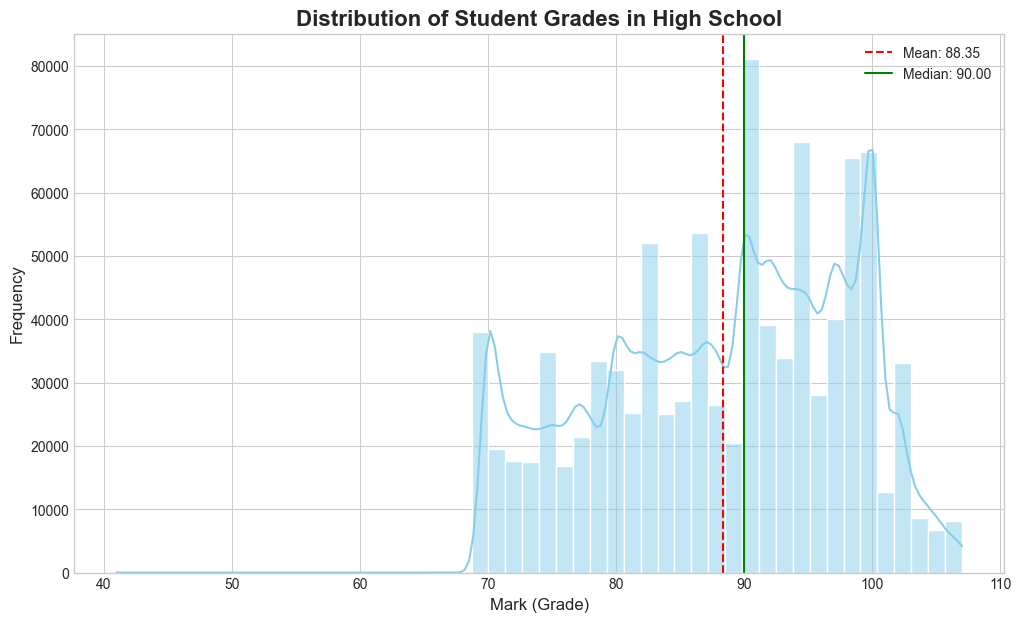

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Student Grade
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

# Convert 'Mark' column to a numeric type. Errors will become NaN.
hs_grades_cleaned['Mark'] = pd.to_numeric(hs_grades_cleaned['Mark'], errors='coerce')

# Filter out nulls and grades of 0, which may skew the plot
grades_to_plot = hs_grades_cleaned[hs_grades_cleaned['Mark'].notna() & (hs_grades_cleaned['Mark'] > 0)]

sns.histplot(grades_to_plot['Mark'], bins=50, kde=True, color='skyblue')

plt.title('Distribution of Student Grades in High School', fontsize=16, fontweight='bold')
plt.xlabel('Mark (Grade)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(grades_to_plot['Mark'].mean(), color='red', linestyle='--', label=f'Mean: {grades_to_plot["Mark"].mean():.2f}')
plt.axvline(grades_to_plot['Mark'].median(), color='green', linestyle='-', label=f'Median: {grades_to_plot["Mark"].median():.2f}')
plt.legend()
plt.show()

/var/folders/h6/zpsbdpxs6dxg5vq66fkdgnr00000gp/T/ipykernel_16932/93207988.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


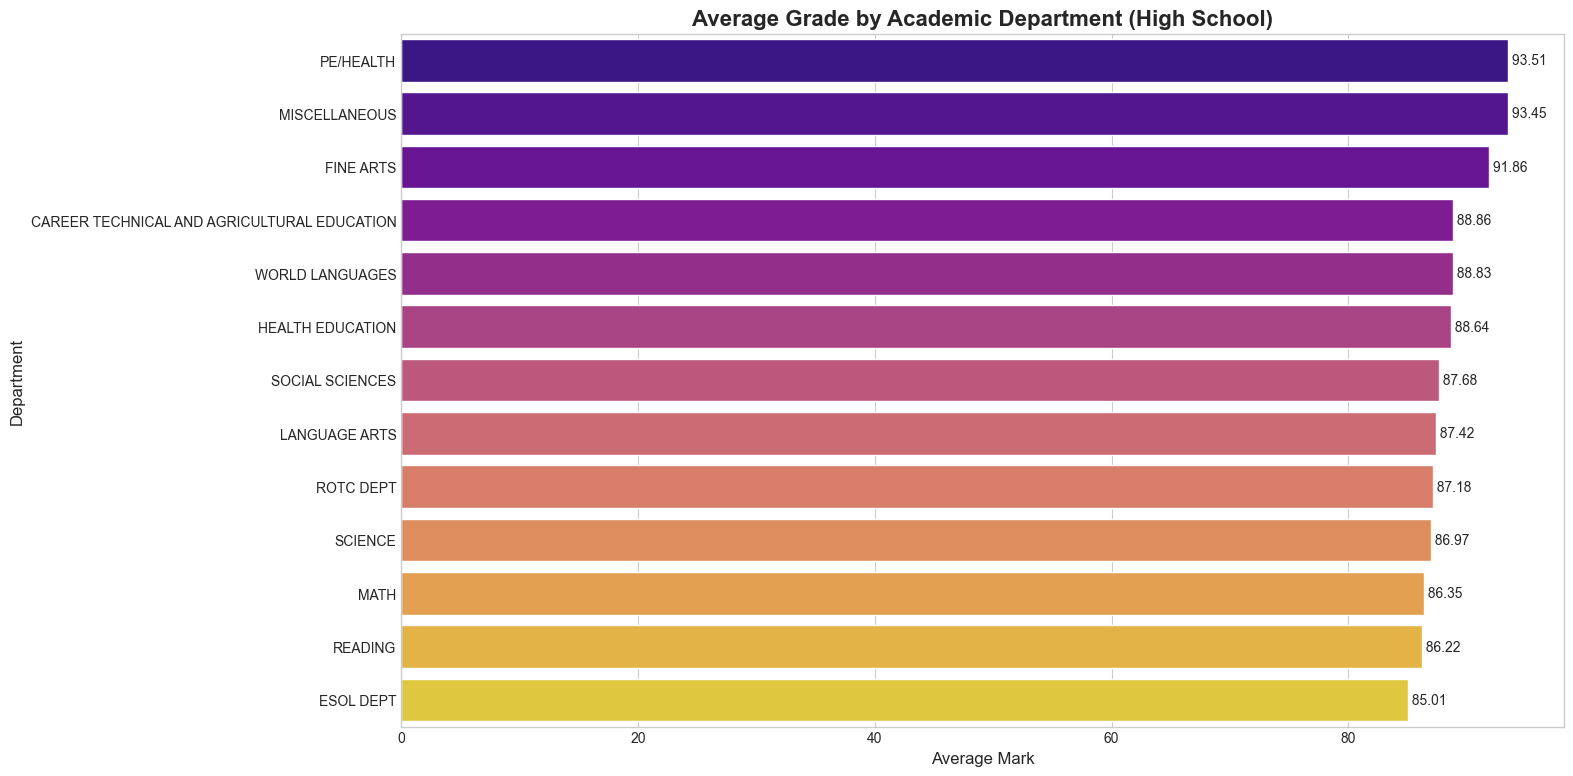

In [32]:
hs_grades_cleaned['Mark'] = pd.to_numeric(hs_grades_cleaned['Mark'], errors='coerce')

# First, merge grades with courses to get Department Descriptions
grades_with_dept = pd.merge(
    hs_grades_cleaned[['student_id', 'CourseNumber', 'Mark']],
    courses_active[['siscourseidentifier', 'DepartmentDesc']],
    left_on='CourseNumber',
    right_on='siscourseidentifier',
    how='inner'
)

# Now that 'Mark' is numeric, this calculation will succeed.
# Drop any rows with NaN in 'Mark' or 'DepartmentDesc' before grouping
grades_with_dept.dropna(subset=['Mark', 'DepartmentDesc'], inplace=True)
avg_grades_by_dept = grades_with_dept.groupby('DepartmentDesc')['Mark'].mean().sort_values(ascending=False).reset_index()

# Plot the results
plt.figure(figsize=(15, 9))
sns.barplot(
    x='Mark',
    y='DepartmentDesc',
    data=avg_grades_by_dept,
    palette='plasma'
)

plt.title('Average Grade by Academic Department (High School)', fontsize=16, fontweight='bold')
plt.xlabel('Average Mark', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.xticks(rotation=0)

# Add the value labels on the bars
for index, value in enumerate(avg_grades_by_dept['Mark']):
    plt.text(value, index, f' {value:.2f}', va='center')

plt.show()

/var/folders/h6/zpsbdpxs6dxg5vq66fkdgnr00000gp/T/ipykernel_16932/759573889.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grades_with_honors['HonorsDesc'].fillna('Standard', inplace=True)
/var/folders/h6/zpsbdpxs6dxg5vq66fkdgnr00000gp/T/ipykernel_16932/759573889.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HonorsDesc', y='Mark', data=grades_with_honors, palette=

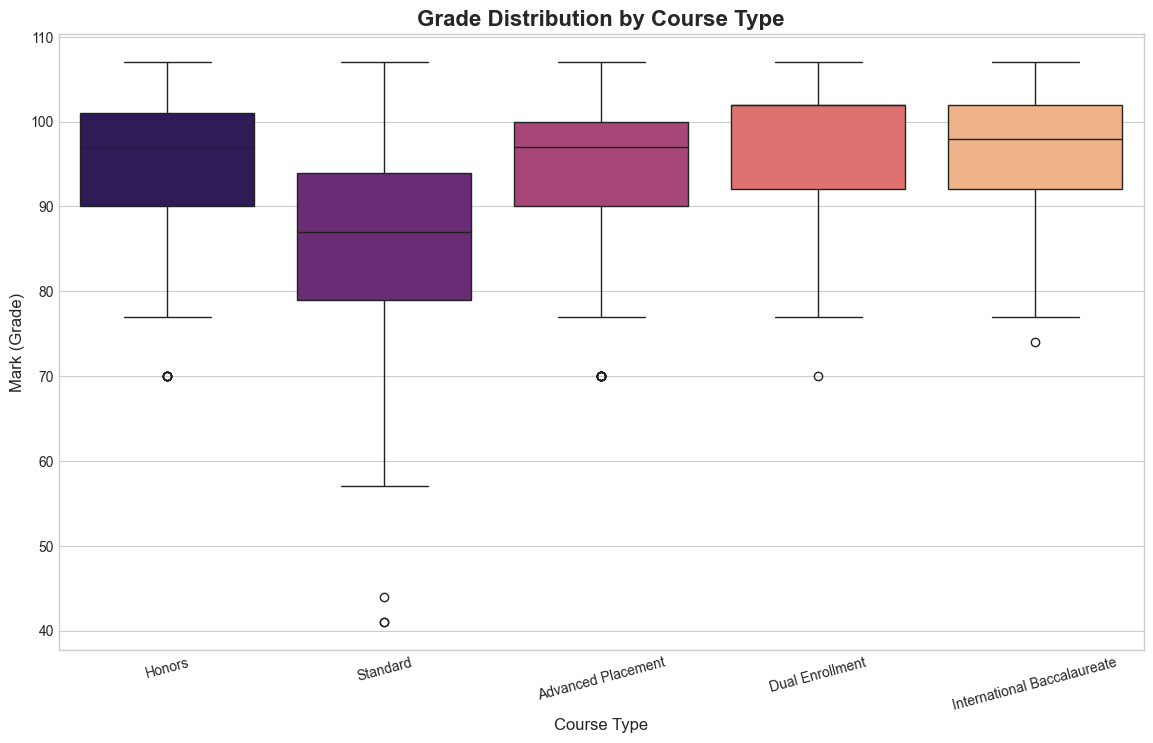

In [34]:
# Ensure the 'Mark' column is numeric
hs_grades_cleaned['Mark'] = pd.to_numeric(hs_grades_cleaned['Mark'], errors='coerce')

# Merge grades with course info to get the 'HonorsDesc'
grades_with_honors = pd.merge(
    hs_grades_cleaned[['CourseNumber', 'Mark']],
    courses_active[['siscourseidentifier', 'HonorsDesc']],
    left_on='CourseNumber',
    right_on='siscourseidentifier',
    how='left'
)

# Fill NaN values in 'HonorsDesc' with 'Standard' to represent regular courses
grades_with_honors['HonorsDesc'].fillna('Standard', inplace=True)
grades_with_honors.dropna(subset=['Mark'], inplace=True)

# Plot the distributions
plt.figure(figsize=(14, 8))
sns.boxplot(x='HonorsDesc', y='Mark', data=grades_with_honors, palette='magma')
plt.title('Grade Distribution by Course Type', fontsize=16, fontweight='bold')
plt.xlabel('Course Type', fontsize=12)
plt.ylabel('Mark (Grade)', fontsize=12)
plt.xticks(rotation=15)
plt.show()


In [ ]:
display(courses_active)